In [6]:
#importing initial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb

In [4]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.8 MB/s eta 0:00:00a 0:00:01


In [8]:
# Read data and keep index as date and time

data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'],index_col=['Unnamed: 0'])
data.index = pd.to_datetime(data.index)

In [10]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [12]:
# cleaning duplicates inplace

data.drop_duplicates(inplace=True)

In [14]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [16]:
data.shape

(95185, 21)

In [18]:
data.nunique()

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38947
Blade2PitchAngle                39023
Blade3PitchAngle                39023
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38125
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94225
dtype: int64

In [20]:
# remove the ones that repeat their values as shown above

data.drop(['ControlBoxTemperature','WTG'], axis=1, inplace=True)

In [22]:
data.shape

(95185, 19)

In [24]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [26]:
data =  data[data['ActivePower']>=0]

In [28]:
data.shape

(78989, 19)

In [32]:
# checking empty values on data
data.isna().sum()

ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26821
Blade1PitchAngle                43282
Blade2PitchAngle                43365
Blade3PitchAngle                43365
GearboxBearingTemperature       26819
GearboxOilTemperature           26806
GeneratorRPM                    26810
GeneratorWinding1Temperature    26792
GeneratorWinding2Temperature    26785
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26816
TurbineStatus                   26466
WindDirection                   20429
WindSpeed                         308
dtype: int64

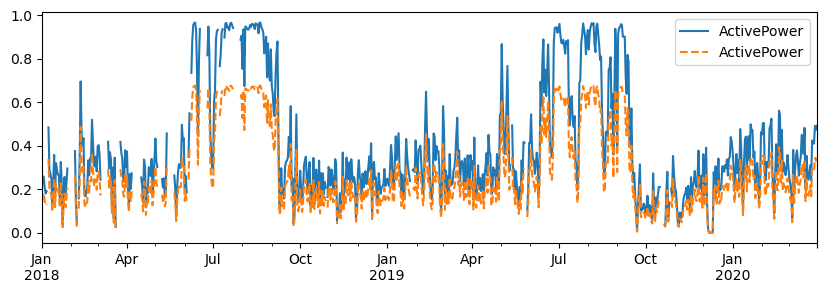

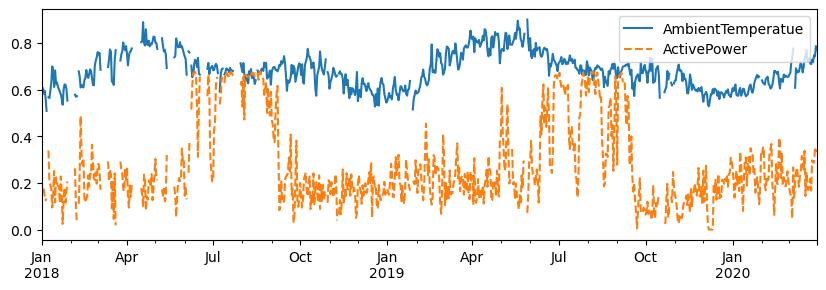

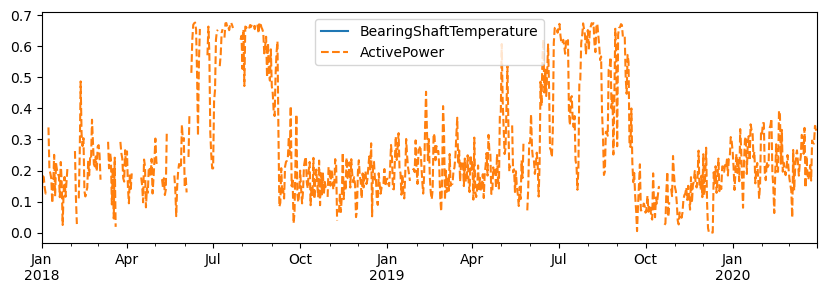

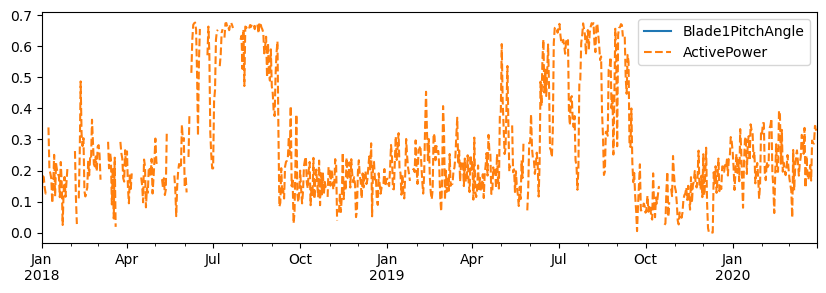

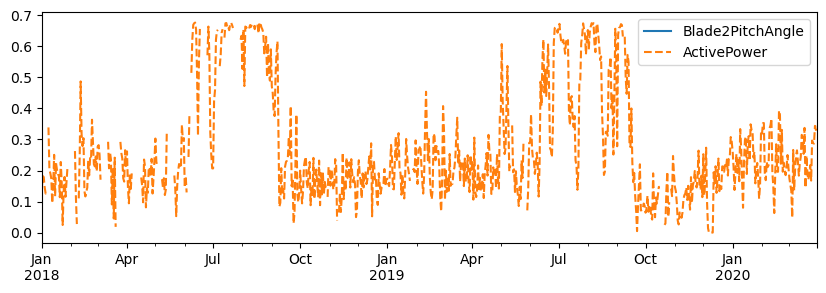

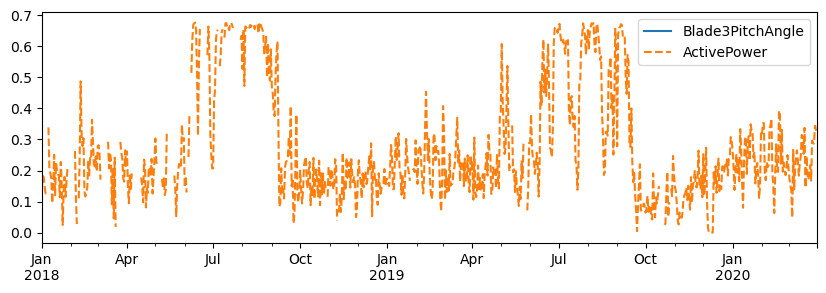

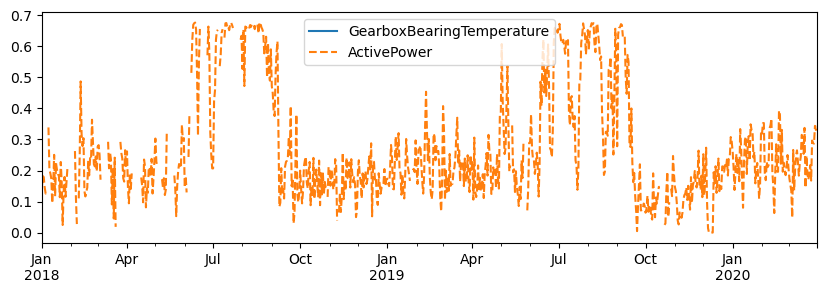

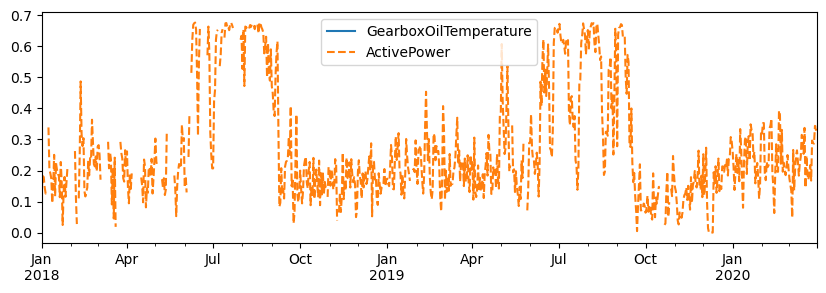

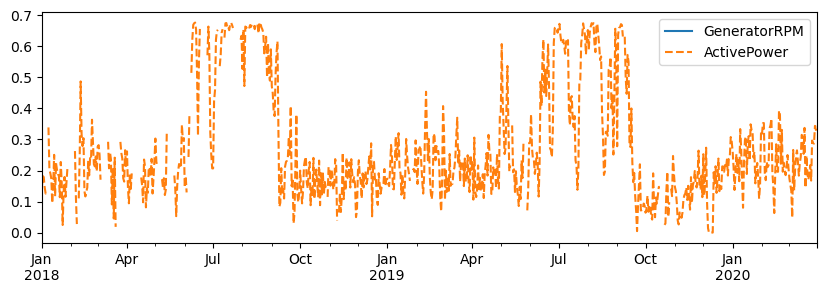

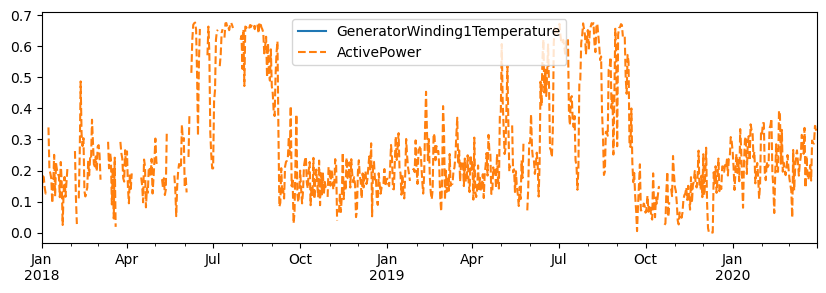

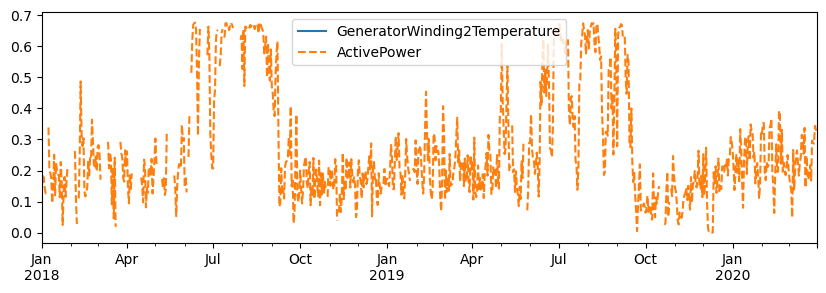

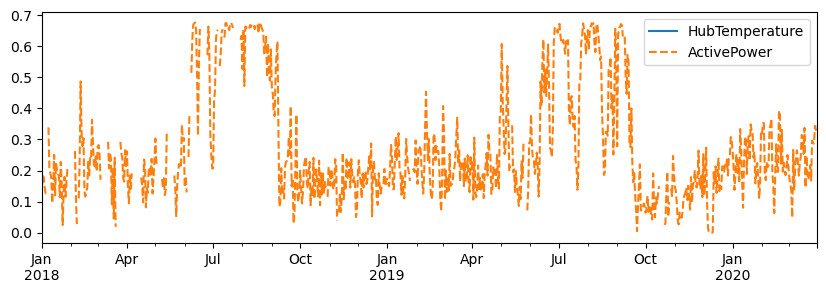

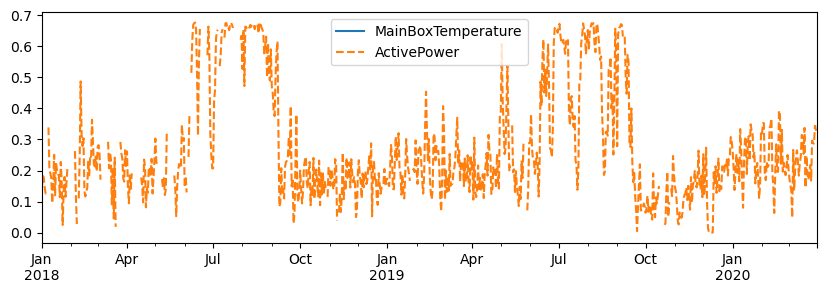

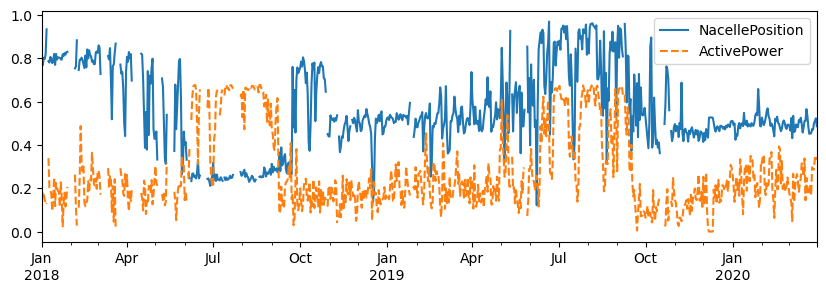

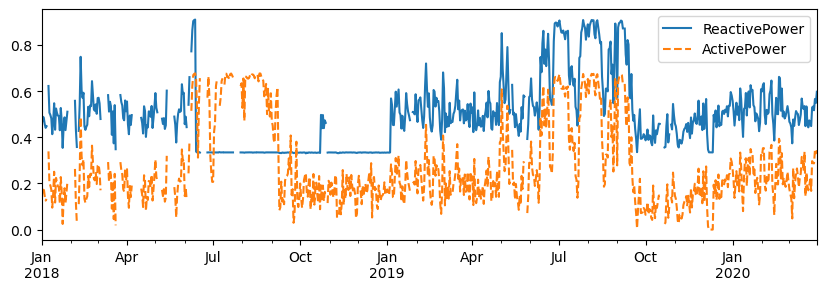

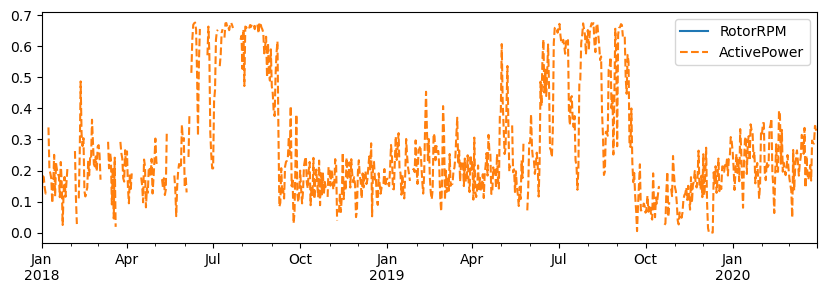

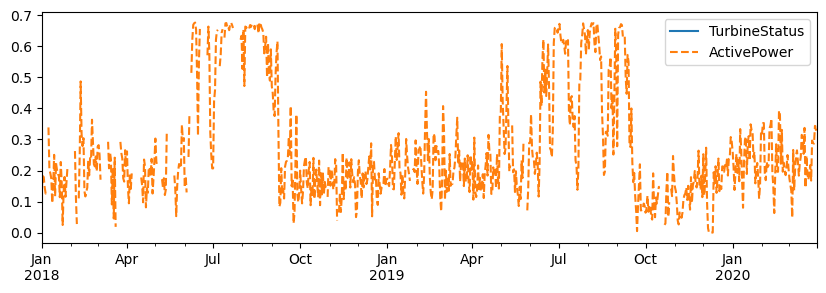

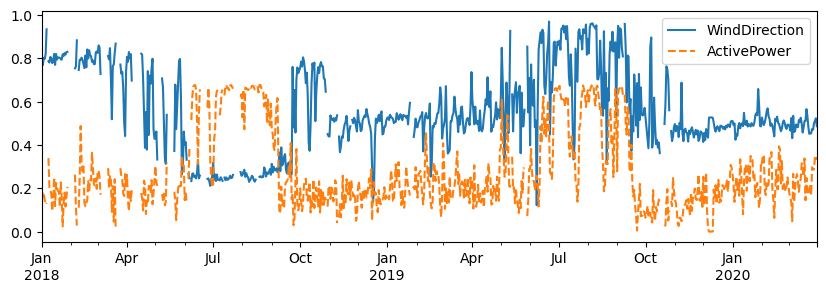

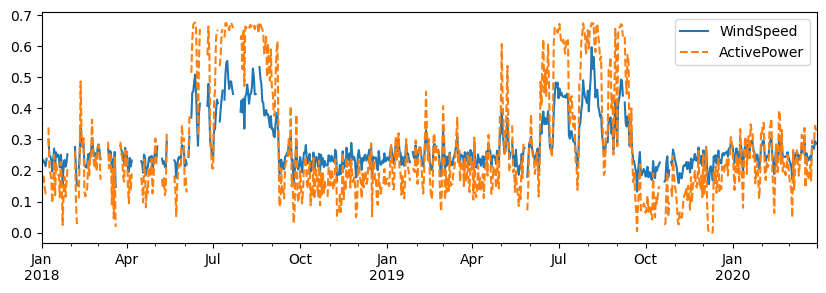

In [34]:
#data visualization

d2 = data.copy()
for i in data:
    mini = min(d2[i])
    maxi = max(d2[i])
    d2[i] = (d2[i]- mini)/(maxi-mini)
    
    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


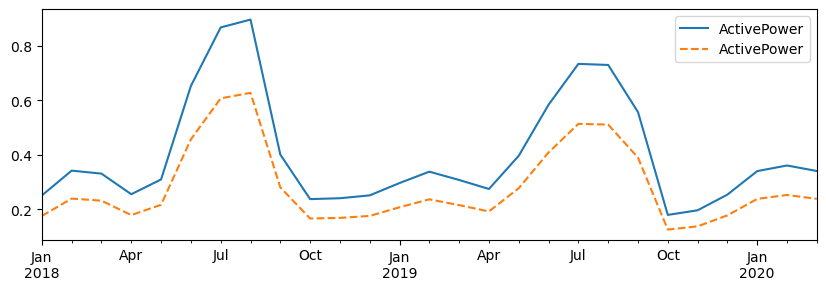

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


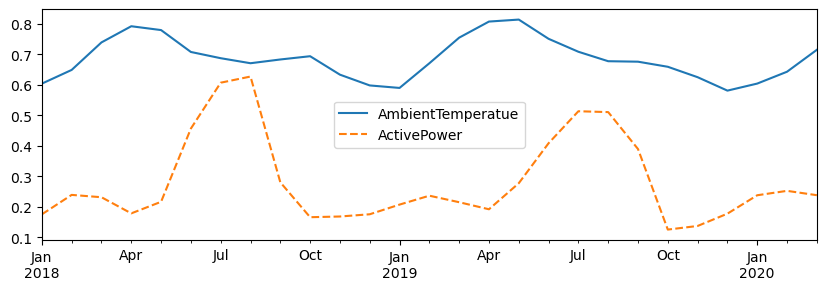

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


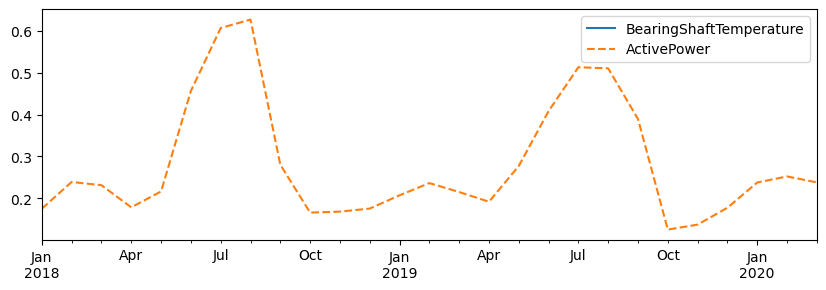

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


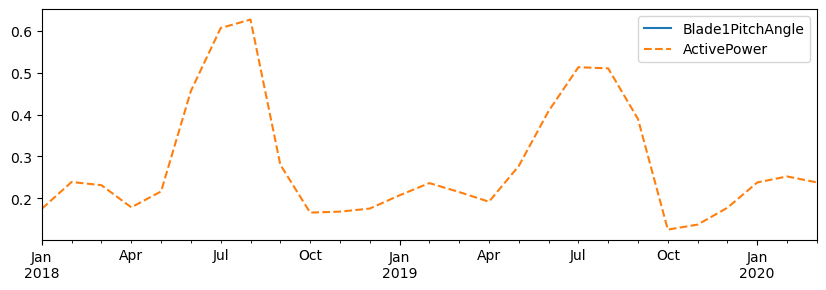

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


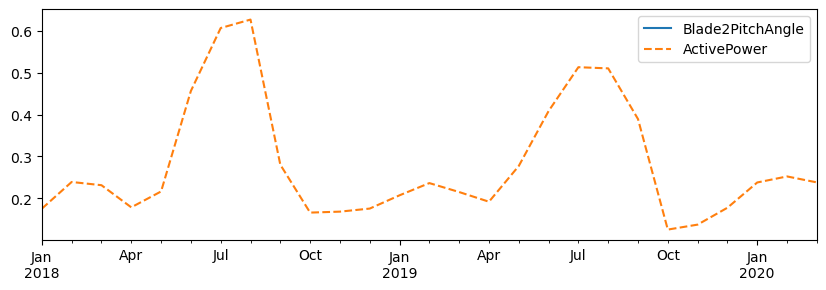

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


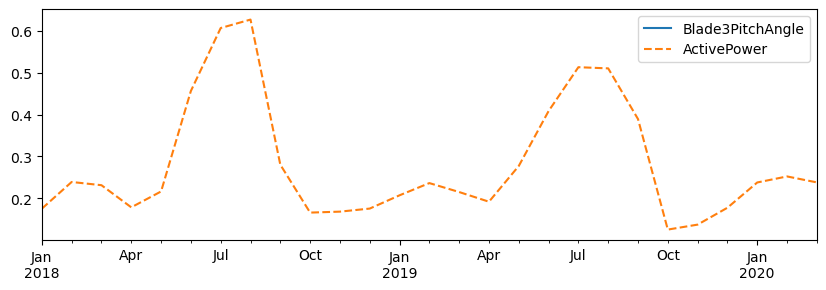

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


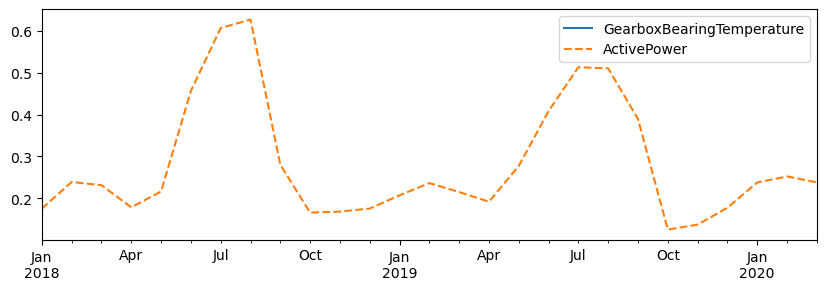

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


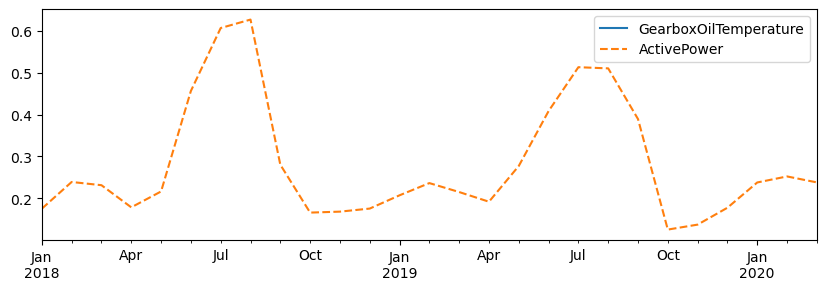

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


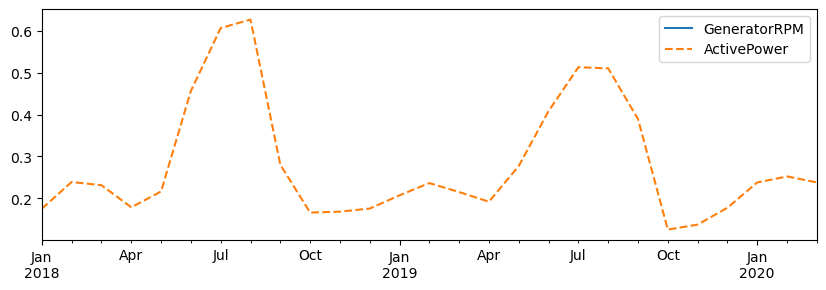

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


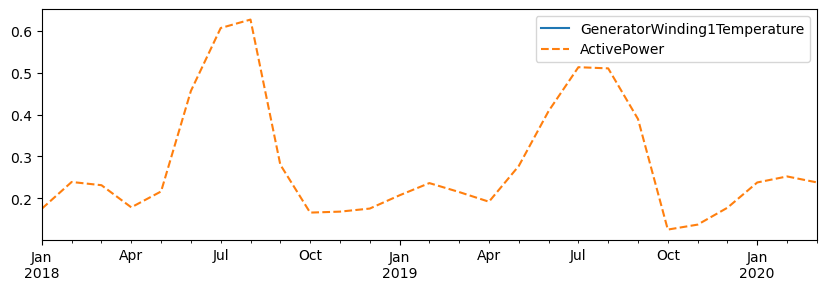

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


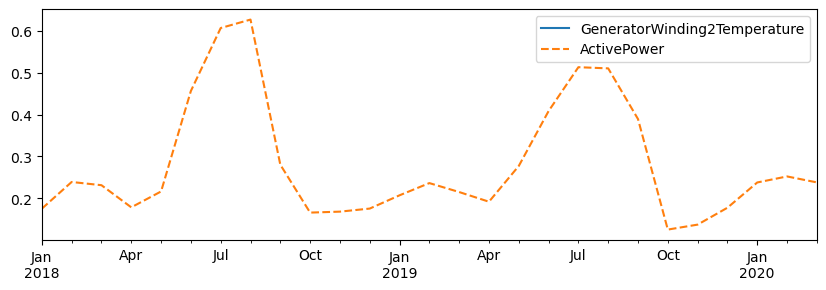

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


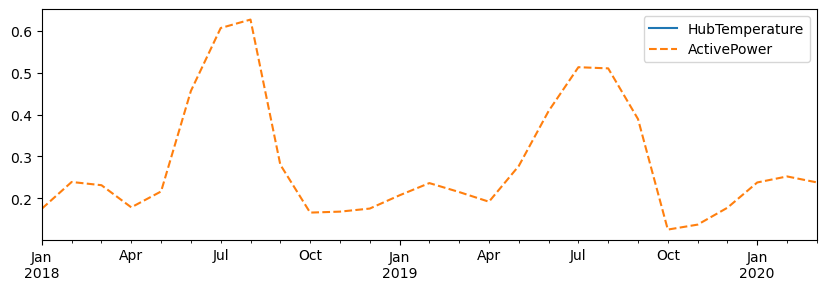

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


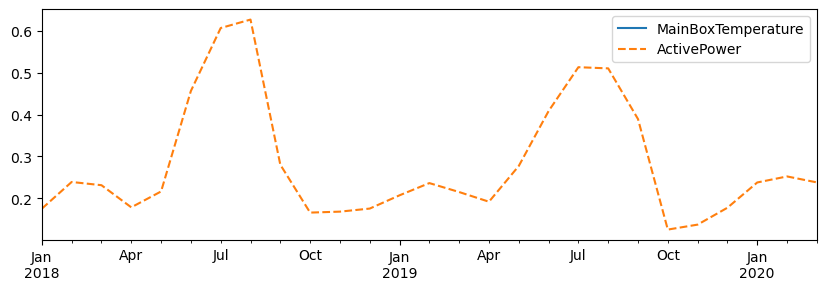

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


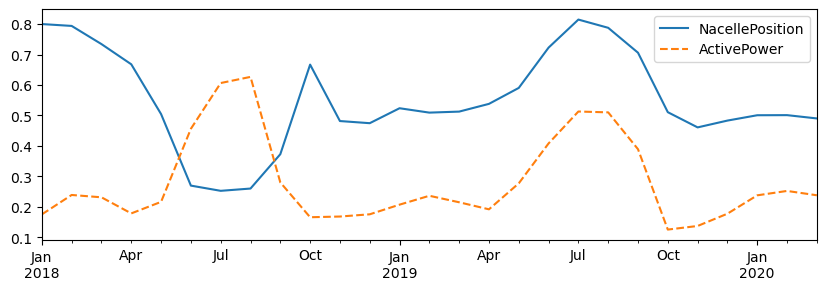

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


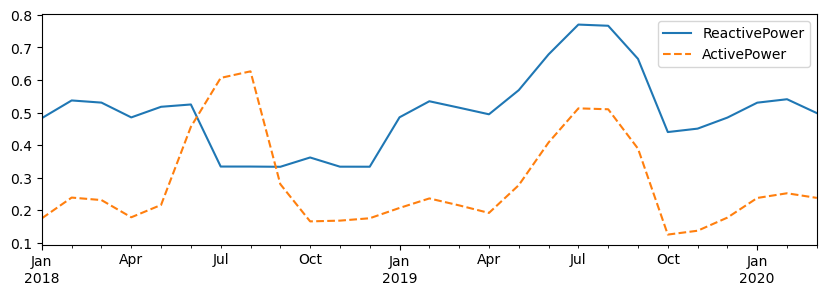

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


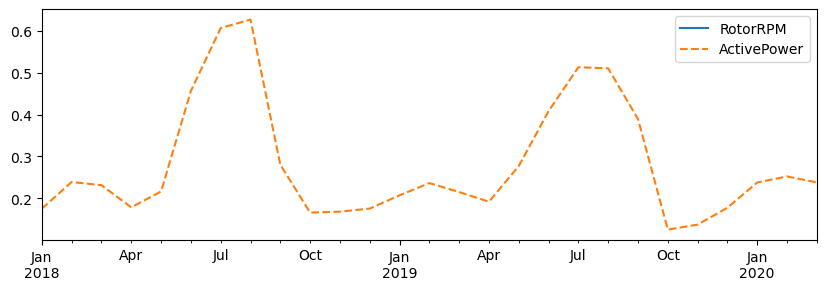

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


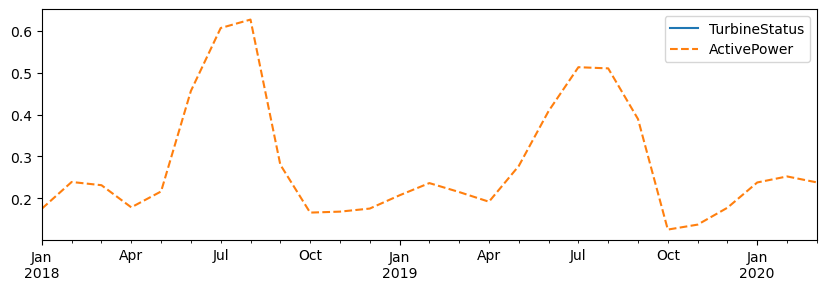

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


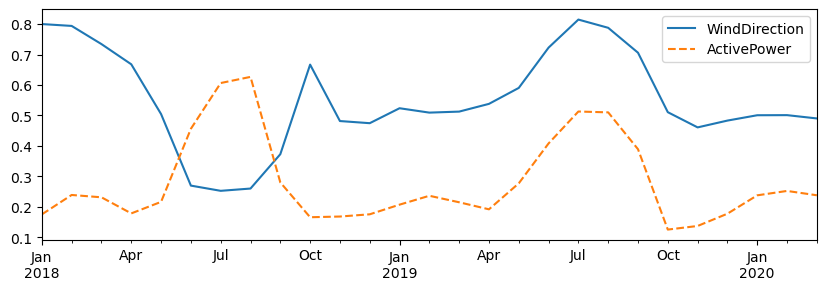

/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d2[i].resample('M').mean().plot(legend=i)
/var/folders/jg/3qry28jd0rq5s_mmhlqcf9pr0000gn/T/ipykernel_31623/894481047.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')


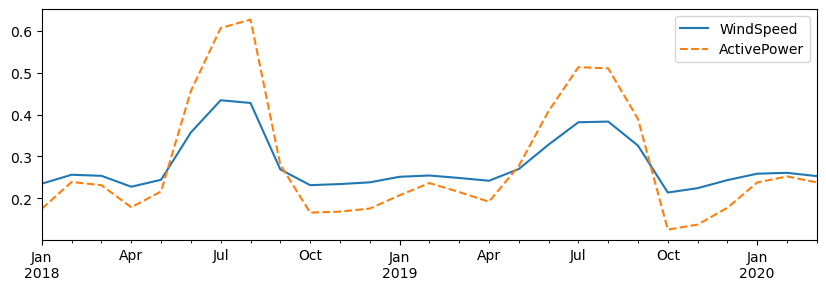

In [40]:
for i in data:

    
    plt.figure(figsize=(10,3))
    d2[i].resample('M').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

<Axes: >

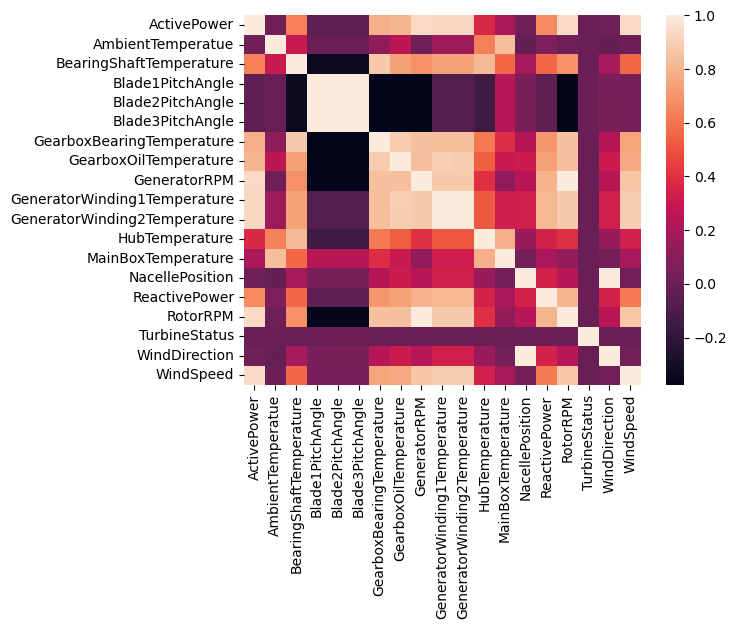

In [42]:
# taking another look on the relations among variables. since our main variable is activePower

sns.heatmap(data.corr())

In [44]:
# 

correlations = data.corr().unstack().sort_values(ascending=False) 

# checking  ActivePower correlations
correlations['ActivePower'].drop_duplicates()

ActivePower                     1.000000
WindSpeed                       0.937870
RotorRPM                        0.935928
GeneratorRPM                    0.934303
GeneratorWinding2Temperature    0.928769
GeneratorWinding1Temperature    0.927517
GearboxOilTemperature           0.801319
GearboxBearingTemperature       0.786150
ReactivePower                   0.662808
BearingShaftTemperature         0.631922
HubTemperature                  0.372788
MainBoxTemperature              0.207514
NacellePosition                 0.024547
AmbientTemperatue               0.019064
TurbineStatus                  -0.001115
Blade1PitchAngle               -0.042637
Blade3PitchAngle               -0.042700
dtype: float64

In [48]:
# WindSpeed is the most related variable to our main, the other depends on it so we are taking it

data = data[['ActivePower','WindSpeed']]
data.dropna()

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363
...,...,...
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468


In [50]:
len(data)

78989

In [52]:
X_train, X_test, y_train,y_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:], data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 989, 78000, 989)

In [54]:
model = xgb.XGBRegressor(n_estimators = 200)

In [62]:
import xgboost as xgb
from xgboost.callback import EarlyStopping

In [72]:
early_stopping = EarlyStopping(
    rounds=50,
    min_delta=0.001,
    metric_name="rmse"
)

In [76]:
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

[0]	validation_0-rmse:421.79117	validation_1-rmse:367.13874
[1]	validation_0-rmse:301.32622	validation_1-rmse:266.99862
[2]	validation_0-rmse:219.29896	validation_1-rmse:199.54566
[3]	validation_0-rmse:164.78250	validation_1-rmse:155.34570
[4]	validation_0-rmse:129.95348	validation_1-rmse:127.54062
[5]	validation_0-rmse:108.87863	validation_1-rmse:110.79585
[6]	validation_0-rmse:96.88342	validation_1-rmse:101.17347
[7]	validation_0-rmse:90.42261	validation_1-rmse:95.79071
[8]	validation_0-rmse:87.07759	validation_1-rmse:92.79709
[9]	validation_0-rmse:85.38884	validation_1-rmse:91.12945
[10]	validation_0-rmse:84.54651	validation_1-rmse:90.17631
[11]	validation_0-rmse:84.13030	validation_1-rmse:89.60735
[12]	validation_0-rmse:83.92389	validation_1-rmse:89.26358
[13]	validation_0-rmse:83.82089	validation_1-rmse:89.05939
[14]	validation_0-rmse:83.77060	validation_1-rmse:88.93478
[15]	validation_0-rmse:83.74575	validation_1-rmse:88.84768
[16]	validation_0-rmse:83.73308	validation_1-rmse:88.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [78]:
pred = model.predict(X_test)

In [80]:
df_final = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred })  

In [84]:
from sklearn.metrics import *
import numpy as np

In [88]:
from sklearn.metrics import *
import numpy as np

print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
# Calculate RMSE manually by taking the square root of MSE since 'squared' parameter is not available
print('The RMSE error (RMSE)                        = {:.2f}'.format(np.sqrt(mean_squared_error(df_final['Actuals'],df_final['Predictions']))))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions'])))

The Coefficient of determination (R-squared) = 0.970
The mean absolute error (MAE)                = 63.05
The RMSE error (RMSE)                        = 88.66
The Mean absolute percentage error (MAPE)    = 0.475


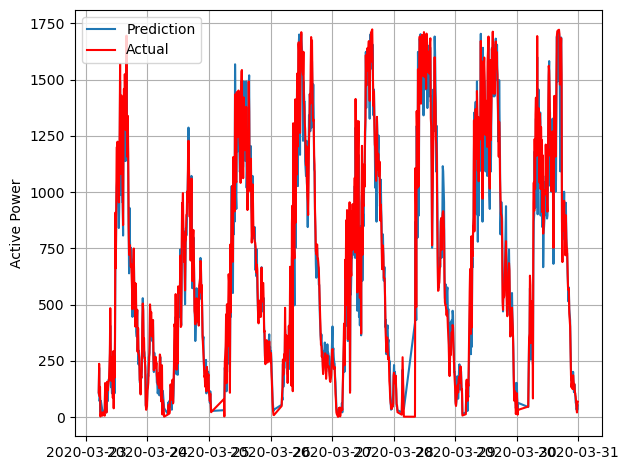

In [90]:
plt.plot(df_final['Predictions'],label='Prediction')
plt.plot(df_final['Actuals'], color='red',label='Actual')

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<Axes: ylabel='ActivePower'>

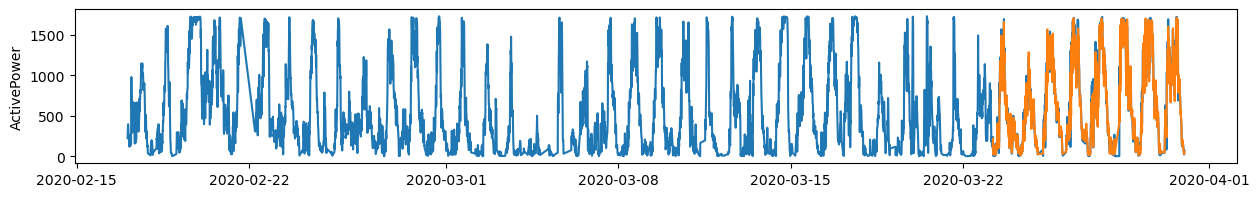

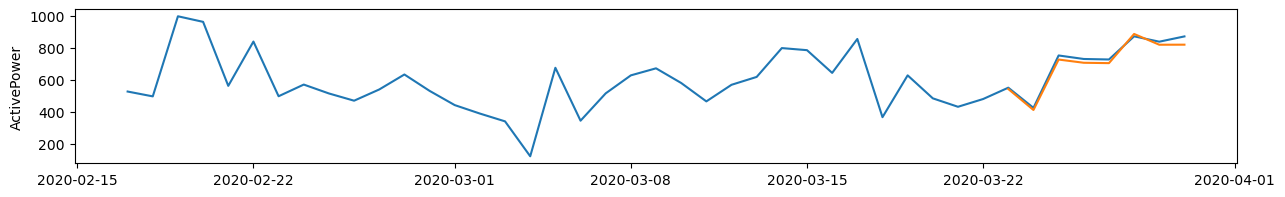

In [92]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_final['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean())
sns.lineplot(data = df_final['Predictions'].resample('D').mean())

# New test only dates as features

In [95]:
data.tail()

,ActivePower,WindSpeed
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468
2020-03-30 23:50:00+00:00,68.664425,3.475205


In [97]:
# create from 2020-03-30

new = pd.date_range('2020-04-01 12:00:00+00:00','2020-06-01 12:00:00+00:00', freq='10min')
new = pd.DataFrame(index=new)

In [99]:
len(new)

8785

In [101]:
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [103]:
data2 = data.copy()
data2 = create_f(data2)

In [105]:
data2.head()

,ActivePower,WindSpeed,hour,minute,day,month,year,dayofweek,dayofyear,weekofyear
2018-01-01 06:20:00+00:00,26.212347,3.042750,6,20,1,1,2018,0,1,1
2018-01-01 06:40:00+00:00,59.632658,3.424814,6,40,1,1,2018,0,1,1
2018-01-01 06:50:00+00:00,40.889650,3.507172,6,50,1,1,2018,0,1,1
2018-01-01 10:40:00+00:00,34.398111,3.442212,10,40,1,1,2018,0,1,1
2018-01-01 12:00:00+00:00,29.797653,3.031363,12,0,1,1,2018,0,1,1


In [107]:
data2.columns

Index(['ActivePower', 'WindSpeed', 'hour', 'minute', 'day', 'month', 'year',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [109]:
data2.isna().sum()

ActivePower      0
WindSpeed      308
hour             0
minute           0
day              0
month            0
year             0
dayofweek        0
dayofyear        0
weekofyear       0
dtype: int64

In [111]:

data2 = data2.dropna()

In [113]:
features = ['hour', 'minute', 'day', 'month', 'year','dayofweek', 'dayofyear']
label = 'ActivePower'
X_train, X_test, y_train,y_test = data2[features][0:78000], data2[features][78000:], data2[label][0:78000],  data2[label][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

In [115]:
model2 = xgb.XGBRegressor(n_estimators = 1000,learning_rate=0.01)
model2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

[0]	validation_0-rmse:590.64594	validation_1-rmse:532.72471
[1]	validation_0-rmse:587.33865	validation_1-rmse:532.33787
[2]	validation_0-rmse:584.05707	validation_1-rmse:531.97837
[3]	validation_0-rmse:580.83841	validation_1-rmse:531.64552
[4]	validation_0-rmse:577.62910	validation_1-rmse:530.97189
[5]	validation_0-rmse:574.46608	validation_1-rmse:530.32547
[6]	validation_0-rmse:571.34893	validation_1-rmse:529.70565
[7]	validation_0-rmse:568.26714	validation_1-rmse:529.09509
[8]	validation_0-rmse:565.23902	validation_1-rmse:528.50664
[9]	validation_0-rmse:562.25033	validation_1-rmse:528.20211
[10]	validation_0-rmse:559.29827	validation_1-rmse:527.65601
[11]	validation_0-rmse:556.39551	validation_1-rmse:527.39468
[12]	validation_0-rmse:553.52957	validation_1-rmse:526.88901
[13]	validation_0-rmse:550.72345	validation_1-rmse:526.65845
[14]	validation_0-rmse:547.94108	validation_1-rmse:526.19693
[15]	validation_0-rmse:545.20217	validation_1-rmse:525.97299
[16]	validation_0-rmse:542.51043	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [117]:
pred = model2.predict(X_test)

In [119]:
df_final2 = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred})

In [123]:
from sklearn.metrics import *
import numpy as np

print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final2['Actuals'],df_final2['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final2['Actuals'],df_final2['Predictions'])))
# Calculate RMSE manually by taking the square root of MSE
print('The RMSE error (RMSE)                        = {:.2f}'.format(np.sqrt(mean_squared_error(df_final2['Actuals'],df_final2['Predictions']))))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final2['Actuals'],df_final2['Predictions'])))

The Coefficient of determination (R-squared) = 0.100
The mean absolute error (MAE)                = 387.22
The RMSE error (RMSE)                        = 503.61
The Mean absolute percentage error (MAPE)    = 2.154


<Axes: ylabel='ActivePower'>

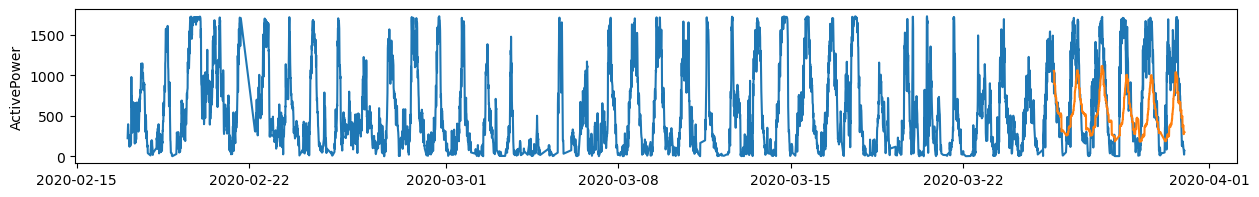

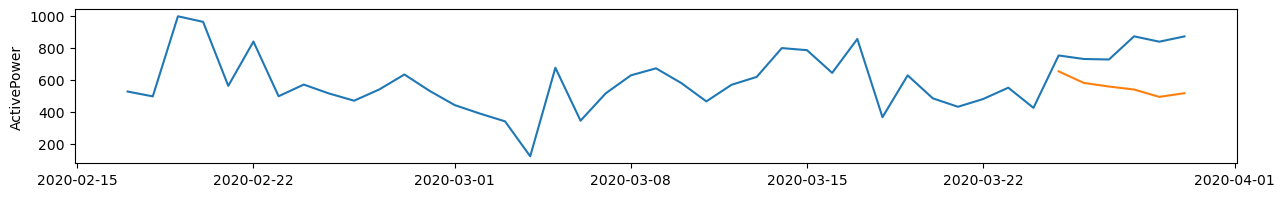

In [125]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = df_final2['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = df_final2['Predictions'].resample('D').mean())

In [127]:
new = create_f(new)
print(new[features].head())
fut = model2.predict(new[features])
future = pd.DataFrame(data={'Predictions':fut}, index = new.index)  

                           hour  minute  day  month  year  dayofweek  \
2020-04-01 12:00:00+00:00    12       0    1      4  2020          2   
2020-04-01 12:10:00+00:00    12      10    1      4  2020          2   
2020-04-01 12:20:00+00:00    12      20    1      4  2020          2   
2020-04-01 12:30:00+00:00    12      30    1      4  2020          2   
2020-04-01 12:40:00+00:00    12      40    1      4  2020          2   

                           dayofyear  
2020-04-01 12:00:00+00:00         92  
2020-04-01 12:10:00+00:00         92  
2020-04-01 12:20:00+00:00         92  
2020-04-01 12:30:00+00:00         92  
2020-04-01 12:40:00+00:00         92  


<Axes: ylabel='ActivePower'>

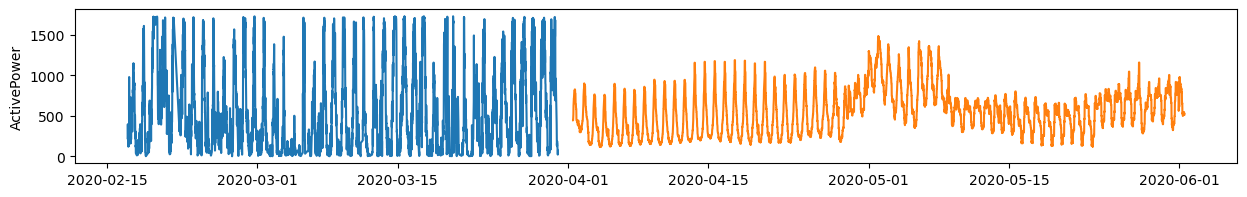

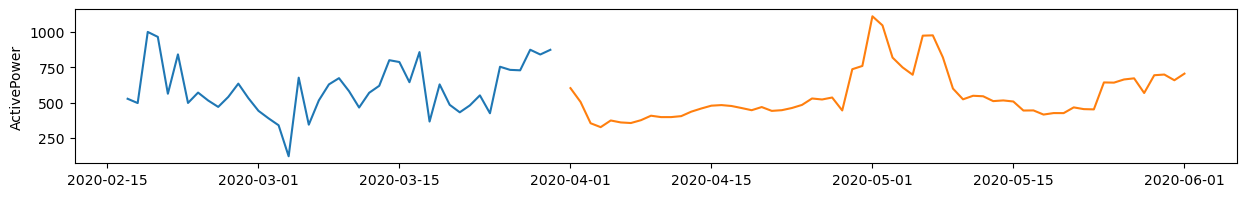

In [129]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = future['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = future['Predictions'].resample('D').mean())

# Save the model

In [132]:
import pickle
file_name = "model2.pkl"
#model.save_model('model1.json')
pickle.dump(model2, open(file_name, "wb"))
